# Analisis exploratorio de datos (EDA)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
DATASET_PATH = '../data/yellow_tripdata_2020-02.parquet'

In [3]:
raw_df = pd.read_parquet(DATASET_PATH)

Visualizamos los primeros datos

Column wiki: 

- VendorID: taxi provider

- tpep_pickup_datetime: pick up time

- tpep_dropoff_datetime: drop off time

- passenger_count: number of passengers

- trip_distance: in miles

- RatecodeID: category of rate price

- store_and_fwd_flag: This flag indicates whether the trip record was held in vehicle
memory before sending to the vendor, aka “store and forward,”
because the vehicle did not have a connection to the server

- PULocationID: pick up zone

- DOLocationID: Drop Off zone

- payment_type: categorical type

- fare_amount: The time-and-distance fare calculated by the meter

- extra: Miscellaneous extras and surcharges. Currently, this only includes
the $0.50 and $1 rush hour and overnight charges

- mta_tax: $0.50 MTA tax that is automatically triggered based on the metered
rate in use

- Improvement_surcharge: $0.30 improvement surcharge assessed trips at the flag drop. The
improvement surcharge began being levied in 2015

- Tip_amount: Tip amount – This field is automatically populated for credit card
tips. Cash tips are not included.

- Tolls_amount: Total amount of all tolls paid in trip. 

- Total_amount: total price

- Congestion_Surcharge: Total amount collected in trip for NYS congestion surcharge

- airport_fee: $1.25 for pick up only at LaGuardia and John F. Kennedy Airports

In [4]:
raw_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2020-02-01 00:17:35,2020-02-01 00:30:32,1.0,2.60,1.0,N,145,7,1,11.0,0.5,0.5,2.45,0.0,0.3,14.75,0.0,None
1,1,2020-02-01 00:32:47,2020-02-01 01:05:36,1.0,4.80,1.0,N,45,61,1,21.5,3.0,0.5,6.30,0.0,0.3,31.60,2.5,None
2,1,2020-02-01 00:31:44,2020-02-01 00:43:28,1.0,3.20,1.0,N,186,140,1,11.0,3.0,0.5,1.00,0.0,0.3,15.80,2.5,None
3,2,2020-02-01 00:07:35,2020-02-01 00:31:39,1.0,4.38,1.0,N,144,140,1,18.0,0.5,0.5,3.00,0.0,0.3,24.80,2.5,None
4,2,2020-02-01 00:51:43,2020-02-01 01:01:29,1.0,2.28,1.0,N,238,152,2,9.5,0.5,0.5,0.00,0.0,0.3,10.80,0.0,None


In [5]:
raw_df['airport_fee'].unique()

array([None], dtype=object)

In [6]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6299367 entries, 0 to 6299366
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [7]:
## asumptions

NUMERICAL_FEATURES = ['passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',  'total_amount', 'congestion_surcharge']
CATEGORY_FEATURES = ['VendorID', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'airport_fee']
TIME_FEATURES = ['tpep_pickup_datetime', 'tpep_dropoff_datetime']

TARGET = "..."

## Estadísticas descriptivas de variables numéricas

In [8]:
num_df = raw_df[NUMERICAL_FEATURES]

In [9]:
num_df.head()

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2.60,11.0,0.5,0.5,2.45,0.0,0.3,14.75,0.0
1,1.0,4.80,21.5,3.0,0.5,6.30,0.0,0.3,31.60,2.5
2,1.0,3.20,11.0,3.0,0.5,1.00,0.0,0.3,15.80,2.5
3,1.0,4.38,18.0,0.5,0.5,3.00,0.0,0.3,24.80,2.5
4,1.0,2.28,9.5,0.5,0.5,0.00,0.0,0.3,10.80,0.0


In [10]:
num_df.shape

(6299367, 10)

In [11]:
# Calculate stats: 

# Mean:

print("### Mean: ")
print(num_df.mean())
print('\n')

# STD:

print("### Standard deviation: ")
print(num_df.std())
print('\n')

### Mean: 
passenger_count           1.504449
trip_distance             2.864533
fare_amount              12.607359
extra                     1.108678
mta_tax                   0.492763
tip_amount                2.220724
tolls_amount              0.327372
improvement_surcharge     0.297916
total_amount             18.591161
congestion_surcharge      2.307304
dtype: float64


### Standard deviation: 
passenger_count           1.144727
trip_distance            40.274719
fare_amount              11.890528
extra                     1.255356
mta_tax                   0.073665
tip_amount                2.665063
tolls_amount              1.675211
improvement_surcharge     0.034522
total_amount             14.451496
congestion_surcharge      0.690399
dtype: float64




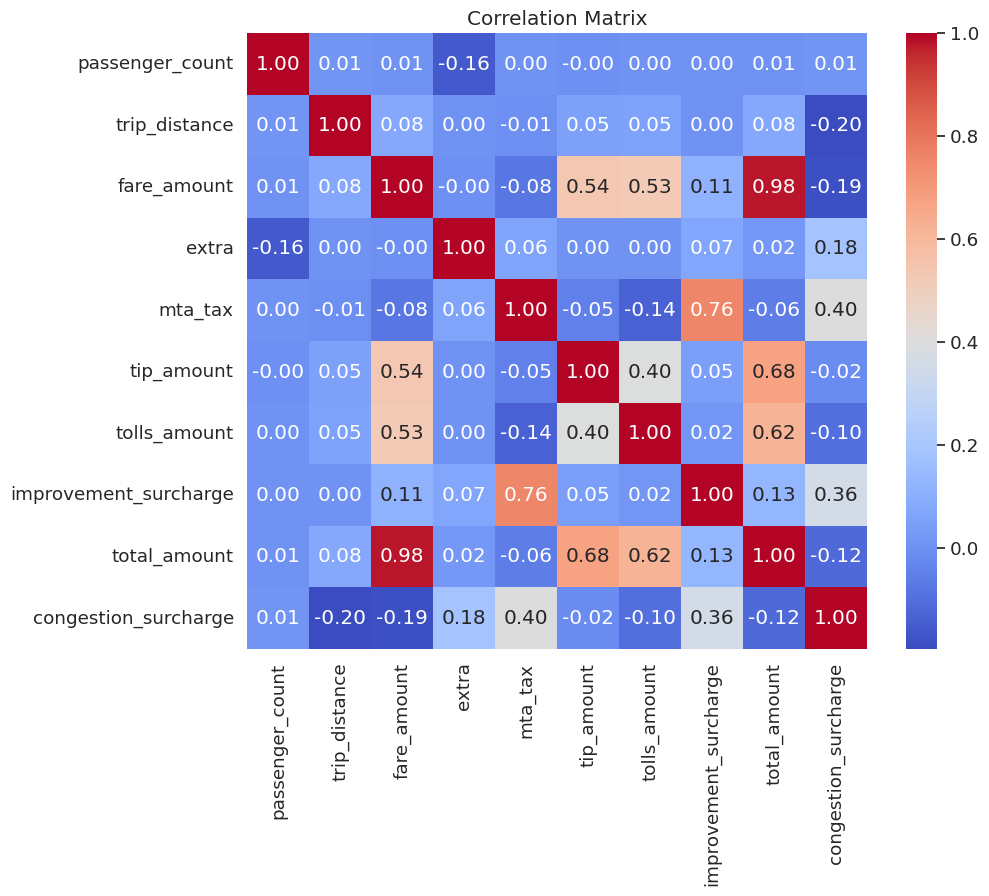

In [12]:
# CORRELATION MATRIX: 


corr_matrix = num_df.corr()

plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.set(font_scale=1.2)  # Adjust font size as needed
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

# Set the title
plt.title("Correlation Matrix")

# Show the plot
plt.show()


In [13]:
# Make a sample from the df to make pair plot

sampled_num__df = num_df.sample(n = 1000, random_state=42)

sns.pairplot(sampled_num_df)

## Estadísticas descriptivas de variables categóricas

## Correlaciones

## Conclusiones

## Separación de datos

## Final

NUMERICAL_FEATURES = [...]
CATEGORY_FEATURES = [...]

TARGET = "..."

In [ ]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(raw_df, test_size=0.2, random_state=42)

In [ ]:
train_df.to_csv(DATASET_PATH = 'train.csv', index=False)
test_df.to_csv(DATASET_PATH = 'test.csv', index=False)